In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import statsmodels.api as sm
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df_selected = confirmed_df
confirmed_df_trimmed = confirmed_df_selected.iloc[:,5:]


## 0. Introduction

The Covid-19 is a contagious coronavirus pandemic that first reported from Wuhan, Hubei, China. This new strain of the virus has struck fear in many countries as cities are quarantined and hospitals are overcrowded. How coronavirus has grown in 2019/2020 and what is his cases distribution in China and other countries are questions to be answered.

A patient could be categorized into three categories - "Confirmed" - "Deaths" - "Recovered".

## 1. Linear Regression Prediction

Recall from Data8 the equations for a best fit line: $\newcommand{\defequals}{\overset{\text{def}}{=}}$

$$ Y_e = \beta X+ \alpha  \,,$$</font>


where $\beta \defequals r\dfrac{\sigma_y}{\sigma_x}$, $\alpha \defequals \bar{y} - b_1\bar{x}$ (where $\bar{y}$ and $\bar{x}$ denote empirical averages), $\hat{y}$ is the predicted value for $y$ given by the best fit line for $x$, $\sigma_y$ and $\sigma_x$ are empirical standard deviations, and $r$ was defined as the average of the product of $x$ in standard units and $y$ in standard units, i.e. $$ r \defequals \frac{1}{n}\sum_{i=1}^n{\left( \frac{(x_i - \bar{x})}{\sigma_x} \frac{(y_i - \bar{y})}{\sigma_y} \right)} \,.$$ It is a useful exercise to show that $r$ so defined is the same as the empirical correlation coefficient $\rho_{xy}$ as defined in this course.

First, let's have a look at the data produced in Hubei Province, China. The coronavirus was first reported in Wuhan, Hubei Province late December 2019. Soon, the World Health Organization declared it PHEIC(Public Health Emergency of International Concern) on January 30, 2020. And then a pandemic on March 11, 2020. Let's first look at the first 25 days of Wuhan confirmed coronavirus cases.

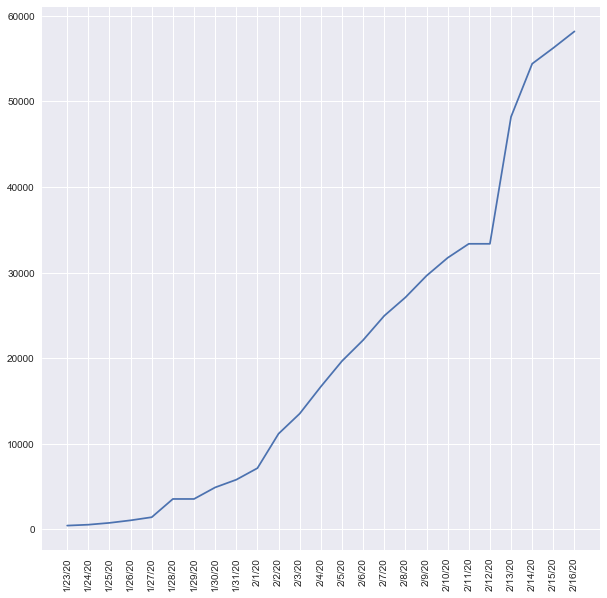

In [3]:
wuhan_cases = confirmed_df_selected[confirmed_df_selected["Province/State"] == 'Hubei'].iloc[0, 5:30]
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.plot(wuhan_cases)
x = np.array(pd.to_datetime(wuhan_cases.index.values).dayofyear.tolist()).astype(float)
y = wuhan_cases.values.astype(float)

### 1.1 Simple Linear Regression

First, let's try to fit a simple linear regression model on this data. Find the best fit line for this dataset using the formulas above.

There are two kinds of variables in a linear regression model: The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X. The output variable is the variable that we want to predict. It is commonly referred to as Y. We can think of our predictor $X$ and responses $Y$ as random variables, with the values $x$ and $y$ in our actual dataset being the observed outcomes of these random variables. Then the statistical model corresponding to linear regression assumes that the true distribution of which our data is an outcome corresponds to the relationship:

$$ Y_e = \beta X+ \alpha  \,,$$

where Yₑ is the estimated or predicted value of Y based on our linear equation.

It can be shown that under this framework, the true values of the parameters $\beta$ and $\alpha$ must equal:

$$\beta = \frac{\operatorname{Cov}(X,Y)}{\operatorname{Var}(X)}\,, $$

$$\alpha = \mathbb{E}[Y] - \beta_1\mathbb{E}[X] \,.$$

Therefore in order to estimate $\beta_1$ and $\beta_0$, we only need to estimate:
- $\operatorname{Cov}(X,Y)$ (using  the empirical covariance $\frac{1}{n}\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}$,
- $\operatorname{Var}(X)$ (using the empirical variance $\sum_{i=1}^n{(x_i - \bar{x})^2}$), 
- $\mathbb{E}[Y]$ (using the empirical mean $\bar{y}$), and
- $\mathbb{E}[X]$ (using the empirical mean $\bar{x}$).



**Warning:** If you use `np.cov` to calculate `b_1`, remember to multiply the result by $\frac{n-1}{n}$, since `np.cov` divides by $n-1$, instead of dividing by $n$ as in our formula.

2453.7223076923074 -65498.44076923076


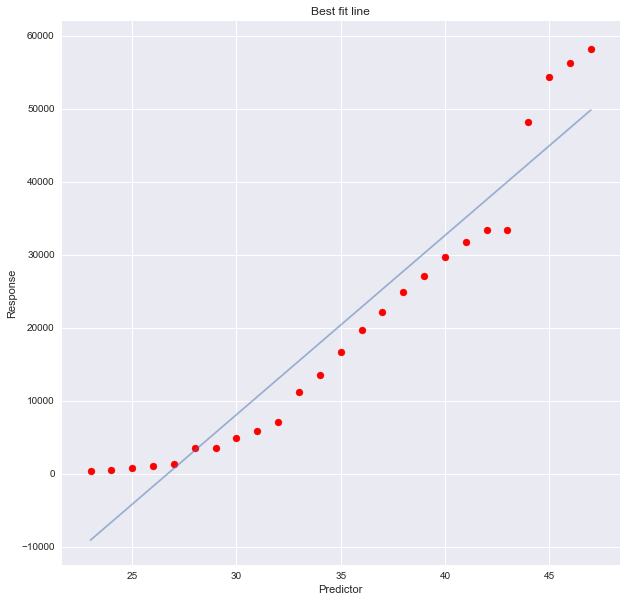

In [4]:
n = len(x)

beta =  ## SOLUTION
alpha =  ## SOLUTION

fitted_values = alpha + beta * x


plt.figure(figsize=(10,10))
plt.plot(x, fitted_values, alpha=0.5)
plt.scatter(x, y, color="red")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Best fit line")

print(beta, alpha)

### 1.2 Regression Diagnostics

Residuals are estimates of experimental error obtained by subtracting the observed responses from the predicted responses.


Examining residuals is a key part of all statistical modeling. Carefully looking at residuals can tell us whether our assumptions are reasonable and our choice of model is appropriate.

Residuals are elements of variation unexplained by fitted model	Residuals can be thought of as elements of variation unexplained by the fitted model. The residuals are expected to be (roughly) normal and (approximately) independently distributed with a mean of 0 and some constant variance.

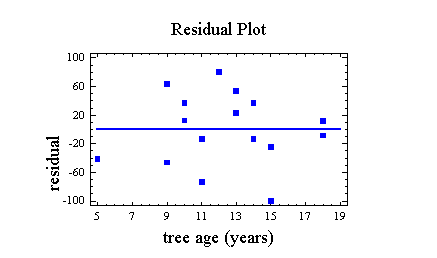

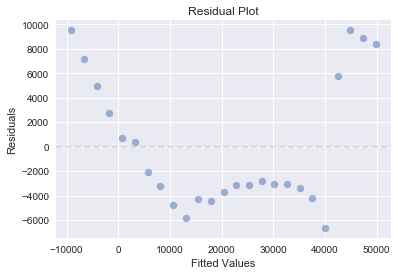

In [5]:
e =  ## SOLUTION

plt.scatter(fitted_values, e, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(alpha=0.25, ls="dashed", color="gray")
plt.show()

Under the assumptions for a linear regression model, the residuals $\hat\varepsilon$ are supposed to be randomly distributed around $0$ (with a standard normal distribution). 

Considering this, does our plot suggest that the assumptions for a linear regression model are (at least approximately) satisfied? (I.e. do these values look like they could be random draws from a standard normal distribution?)

A QQ plot stands for a "quantile-quantile plot".  It is a plot where the axes are purposely transformed such that points sampled from a perfectly normal distribution would be expected to follow a line with slope equal to $1$ and intercept equal to $0$. Therefore, if the plotted points do not appear to form an approiximately straight line, then the underlying distribution which generated them is unlikely to be normal. For example, if the plotted curve bends upward, then there are more large outliers than expected had the points been sampled from a normal distribution. 

We can therefore plot our observed residuals on a QQ plot to check if the assumption that they are sampled from a normal distribution seems plausible.

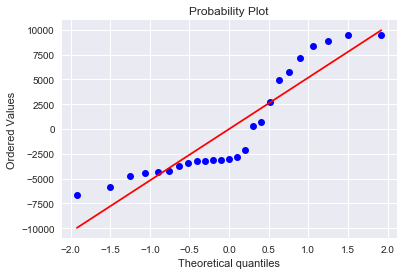

In [6]:
res = stats.probplot(e, plot=plt)

Considering this, does our plot suggest that the assumptions for a linear regression model are (at least approximately) satisfied?

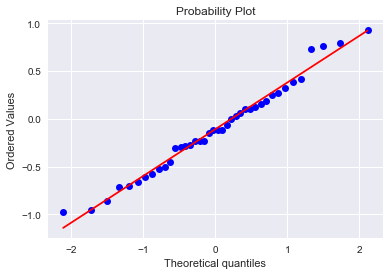

In [7]:
np.random.seed(42)
res = stats.probplot(np.random.normal(0, 0.5, 40), plot=plt)

Considering this, does plot above suggest that the assumptions for a linear regression model are (at least approximately) satisfied?

Before we go further, let's review some definitions for problematic points.

__Outliers__: an outlier is defined as an observation that has a large residual. In other words, the observed value for the point is very different from that predicted by the regression model.

__Leverage points__: A leverage point is defined as an observation that has a value of x that is far away from the mean of x. 

__Influential observations__: An influential observation is defined as an observation that changes the slope of the line. Thus, influential points have a large influence on the fit of the model. One method to find influential points is to compare the fit of the model with and without each observation.

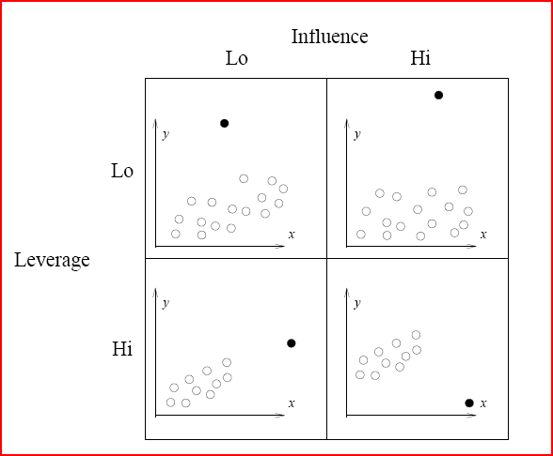

### 1.3 Leverage Plot

Let's go one step away from our coronavirus dataset and look at a mini example. In the dataset below there might be an outlier. When we run linear regression, we always have to make the assumption that the data can be fit linearly. How do we know if a point is an outlier? Does that point indicate an anomaly or does it indicate an increasing trend?

The dataset is plotted below:

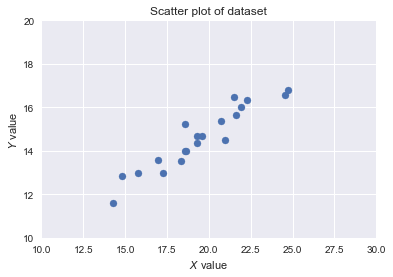

In [8]:
np.random.seed(42)

x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 0.5, 20)

x4 = np.r_[x1]
x4_2 = np.r_[x1, 20]
x4_3 = np.r_[x1, 28]
y4 = np.r_[y1]
y4_2 = np.r_[y1, 12]
y4_3 = np.r_[y1, 12]


plt.xlim(10,30)
plt.ylim(10,20)
plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.xlabel("$X$ value")
plt.ylabel("$Y$ value")
plt.title("Scatter plot of dataset")
plt.show()

Based on the definitions above, do you think the following data set contains any outliers? Or, any high leverage data points?



#### Solution

All of the data points follow the general trend of the rest of the data, so there are no outliers (in the y direction). And, none of the data points are extreme with respect to x, so there are no high leverage points. Overall, none of the data points would appear to be influential with respect to the location of the best fitting line. 

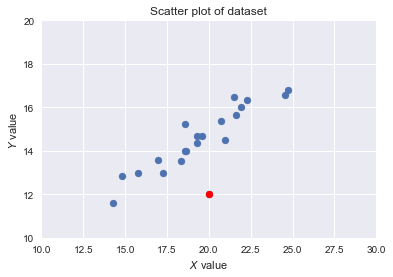

In [9]:
plt.xlim(10,30)
plt.ylim(10,20)
plt.scatter(np.sort(x4_2), y4_2[np.argsort(x4_2)])
plt.scatter(20, 12, color="red")
plt.xlabel("$X$ value")
plt.ylabel("$Y$ value")
plt.title("Scatter plot of dataset")
plt.show()

Now, how about this example? Do you think the following data set contains any outliers? Or, any high leverage data points?



Of course! Because the red data point does not follow the general trend of the rest of the data, it would be considered an outlier. However, this point does not have an extreme x value, so it does not have high leverage. Is the red data point influential? An easy way to determine if the data point is influential is to find the best fitting line twice — once with the red data point included and once with the red data point excluded. The following plot illustrates the two best fitting lines:



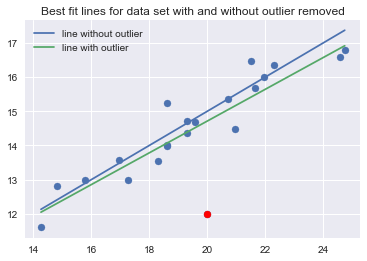

In [10]:
lm = sm.OLS(y4_2, sm.add_constant(x4_2)).fit()

plt.scatter(np.sort(x4_2), y4_2[np.argsort(x4_2)])
plt.scatter(20, 12, color="red")
plt.plot(np.sort(x4), y0[np.argsort(x4)], label="line without outlier")
plt.plot(np.sort(x4_2), lm.predict()[np.argsort(x4_2)], label="line with outlier")
plt.legend()
plt.title("Best fit lines for data set with and without outlier removed")
plt.show()

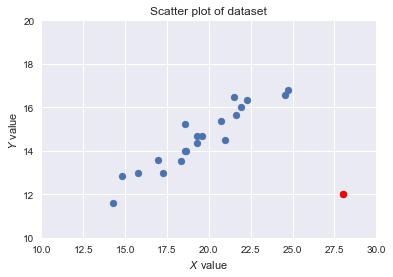

In [11]:
plt.xlim(10,30)
plt.ylim(10,20)
plt.scatter(np.sort(x4_3), y4_3[np.argsort(x4_3)])
plt.scatter(28, 12, color="red")
plt.xlabel("$X$ value")
plt.ylabel("$Y$ value")
plt.title("Scatter plot of dataset")
plt.show()

Now, how about this example? Do you think the following data set contains any outliers? Or, any high leverage data points?



That's right — in this case, the red data point is most certainly an outlier and has high leverage! The red data point does not follow the general trend of the rest of the data and it also has an extreme x value. And, in this case the red data point is influential. The two best fitting lines — one obtained when the red data point is included and one obtained when the red data point is excluded:



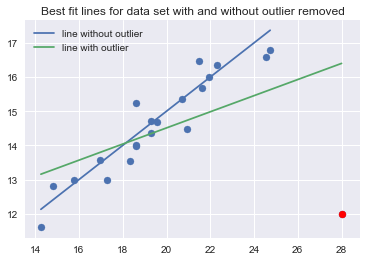

In [12]:
lm = sm.OLS(y4_3, sm.add_constant(x4_3)).fit()

plt.scatter(np.sort(x4_3), y4_3[np.argsort(x4_3)])
plt.scatter(28, 12, color="red")
plt.plot(np.sort(x4), y0[np.argsort(x4)], label="line without outlier")
plt.plot(np.sort(x4_3), lm.predict()[np.argsort(x4_3)], label="line with outlier")
plt.legend()
plt.title("Best fit lines for data set with and without outlier removed")
plt.show()

Based on this plot alone (i.e. before seeing any leverage plot), do you think that this extra point is having a large effect on the results of the regression? Do you think this means the point is an outlier which is "unfairly" making the regression line a less accurate fit to the dataset? Or do you think this suggests that a linear regression model does not explain this dataset well?

### Solution

They are (not surprisingly) substantially different. The green line represents the estimated regression equation with the red data point included, while the blue line represents the estimated regression equation with the red data point taken excluded. 

### 1.4 Making Leverage Plot

Below we create the leverage plot for our dataset:

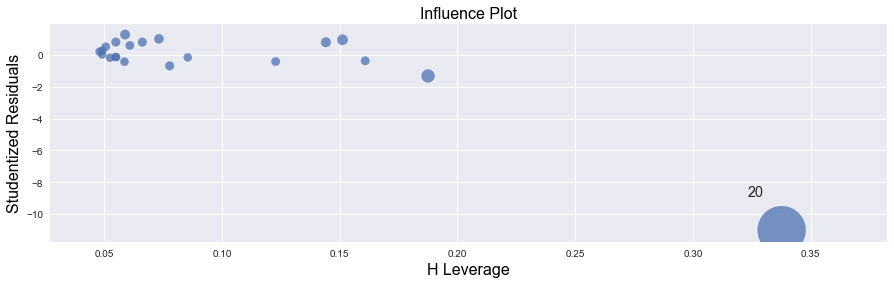

In [13]:
fig, ax = plt.subplots(figsize=(15, 4))
fig = sm.graphics.influence_plot(lm, ax=ax, criterion="cooks")
plt.show()

Any point whose standardized residual has an absolute value greater than  2  is far off from the best fit line. This is what the vertical axis of this plot. The horizontal axis measures how much "leverage" or "influence" a point has in determining the best fit line.

Does the data point corresponding to the circle on the bottom right affect the calculation of the best fit line? If so, how much of an effect does it have? Is it close to or far away from the best fit line?

## 2. Polynomial Regression

### 2.1 Introduction

Let's go back to our coronavirus dataset. A matrix  𝑋  doesn't have to represent a linear function just as what we saw in the coronavirus case.

Below we plot the coronavirus dataset which can be seen visually to be poorly explained by a linear relationship between the predictor and response.

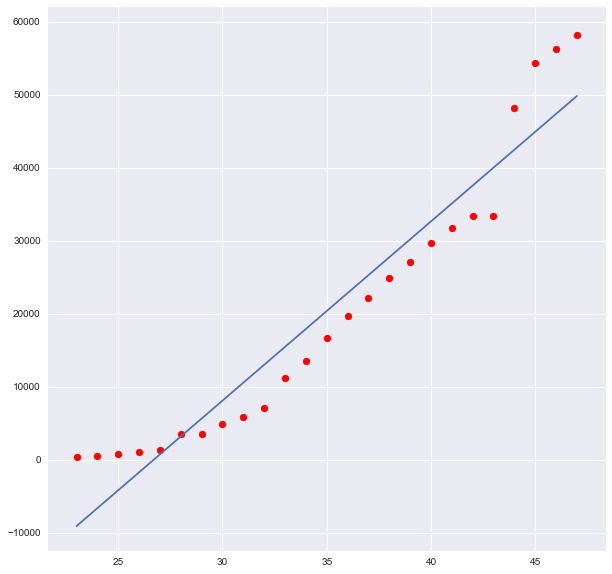

In [14]:
x = np.array(pd.to_datetime(wuhan_cases.index.values).dayofyear.tolist()).astype(float)
y = wuhan_cases.values.astype(float)
lm_2 = sm.OLS(y, sm.add_constant(x)).fit()
fitted_values = lm_2.predict()
plt.figure(figsize=(10,10))
plt.plot(x, fitted_values)
plt.scatter(x, y, color="red")

When the assumptions of the linear regression model hold, the residuals should be drawn randomly from a normal distribution centered at  0 . However, plotting the residuals of this dataset shows a clear trend which is unlikely to occur had the residuals been sampled randomly from a normal distribution, strongly suggesting that the assumptions for linear regression do not hold in this case.

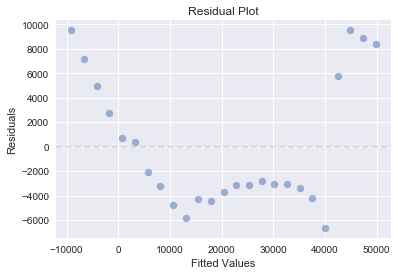

In [15]:
e =  ## SOLUTION

plt.scatter(fitted_values, e, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(alpha=0.25, ls="dashed", color="gray")
plt.title("Residual Plot")
plt.show()

If our best fit line is doomed to fit our data poorly, _how can we achieve a better fit?_ 

In this case we can achieve a better fit by adding more features as predictor variables. In the example above we always regressed one response variable on one predictor variable. However, in general linear regression we can regress on multiple predictor variables. Since the data appears to have a quadratic trend, we will add a new feature (predictor variable) which equals the squares of the $x$ values.

### 2.2. Finding the best fit when there are multiple variables as predictors

Looking at the least squares best fit line:
    
    
$$ Y_e = \beta X+ \alpha  \,,$$</font>


we see that, given any value $x$ of the predictor $X$, it could be written:

$$\hat{y} =  (1, x) \cdot (\alpha, \beta)  \,.$$

If $\mathbf{x}$ is the vector containing all of our observed $x$ values, and $\mathbf{\hat{y}}$ the vector containing all of the predicted values, then the fact that the above relationship holds for each entry of $\mathbf{x}$ can be summarized using the matrix equation: $\newcommand{\defequals}{\overset{\text{def}}{=}}$

$$ \mathbf{\hat{y}} =  \begin{bmatrix} \mathbf{1} & \mathbf{x}  \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \defequals  X b \,,$$ where $$b = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $$

where $\mathbf{1}$ denotes the all $1$'s vector. If $\mathbf{y}$ denotes the vector containing all of the observed $y$ values, then "least squares" best line means that we have chosen the vector $b$ such that it minimizes the sum of the squares of the residuals:

$$ (\mathbf{y} - \mathbf{\hat{y}})^\top (\mathbf{y} - \mathbf{\hat{y}} ) = (\mathbf{y} - X b)^\top (\mathbf{y} - Xb) \,.$$

In general the value of $b$ will be defined in terms of a new type of matrix: (look at notes for definition)

$$ b = (X^\top X)^{-1} X^\top \mathbf{y}\,, \quad \implies \quad \mathbf{\hat{y}} = X b = X (X^\top X)^{-1} X^\top \mathbf{y} \,, $$
the so-called "[normal equation](http://mathworld.wolfram.com/NormalEquation.html)" for linear regression.</font>


<font color="red">**Note:** In most of the problems we did about PCA, the _rows_ corresponded to features, and the _columns_ corresponded to observations. However, in linear regression, the common practice is exactly the opposite: the ***columns*** of $X$ correspond to the $d$ features, and the ***rows*** of $X$ correspond to the $n$ observations. Therefore, in particular, $X^\top X$ is a $d \times d$ matrix, _not_ an $n \times n$ matrix, so $X^\top X$ can still be invertible when the number of observations is (much) larger than the number of features, as long as the observed values of the features (the ***columns*** of $X$) are linearly independent.</font>

### 2.2.1 Add a column with all ones for the intercept

Form the matrix $X$ whose first column is the all ones vector $\mathbf{1}$ and whose second column is the vector of observed predictors $\mathbf{x}$. (**Hints:** `n` is the length of $\mathbf{x}$, and remember [`np.ones`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [`np.column_stack`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html).)

In [16]:
X =  ## SOLUTION

### 2.2.2 Calculate the pseudoinverse

Form the Moore-Penrose psueudoinverse $$(X^\top X)^{-1} X^\top $$

In [17]:
X_pseudo_inverse =  ## SOLUTION

Answers using [`np.linalg.pinv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) are technically correct but won't be accepted.

In [18]:
print('"By hand" pseudoinverse:\n\n', X_pseudo_inverse)

"By hand" pseudoinverse:

 [[ 0.36307692  0.33615385  0.30923077  0.28230769  0.25538462  0.22846154
   0.20153846  0.17461538  0.14769231  0.12076923  0.09384615  0.06692308
   0.04        0.01307692 -0.01384615 -0.04076923 -0.06769231 -0.09461538
  -0.12153846 -0.14846154 -0.17538462 -0.20230769 -0.22923077 -0.25615385
  -0.28307692]
 [-0.00923077 -0.00846154 -0.00769231 -0.00692308 -0.00615385 -0.00538462
  -0.00461538 -0.00384615 -0.00307692 -0.00230769 -0.00153846 -0.00076923
   0.          0.00076923  0.00153846  0.00230769  0.00307692  0.00384615
   0.00461538  0.00538462  0.00615385  0.00692308  0.00769231  0.00846154
   0.00923077]]


As a sanity check, let's compare this with the output of `np.linalg.pinv`.

In [19]:
print("Built-in pseudoinverse:\n\n", np.linalg.pinv(X))

Built-in pseudoinverse:

 [[ 3.63076923e-01  3.36153846e-01  3.09230769e-01  2.82307692e-01
   2.55384615e-01  2.28461538e-01  2.01538462e-01  1.74615385e-01
   1.47692308e-01  1.20769231e-01  9.38461538e-02  6.69230769e-02
   4.00000000e-02  1.30769231e-02 -1.38461538e-02 -4.07692308e-02
  -6.76923077e-02 -9.46153846e-02 -1.21538462e-01 -1.48461538e-01
  -1.75384615e-01 -2.02307692e-01 -2.29230769e-01 -2.56153846e-01
  -2.83076923e-01]
 [-9.23076923e-03 -8.46153846e-03 -7.69230769e-03 -6.92307692e-03
  -6.15384615e-03 -5.38461538e-03 -4.61538462e-03 -3.84615385e-03
  -3.07692308e-03 -2.30769231e-03 -1.53846154e-03 -7.69230769e-04
   8.67361738e-19  7.69230769e-04  1.53846154e-03  2.30769231e-03
   3.07692308e-03  3.84615385e-03  4.61538462e-03  5.38461538e-03
   6.15384615e-03  6.92307692e-03  7.69230769e-03  8.46153846e-03
   9.23076923e-03]]


### 2.2.3 Calculate the coefficient vector

Use the Moore-Penrose pseudoinverse to get the coefficient vector $b$:


$$ b = (X^\top X)^{-1} X^\top \mathbf{y}\, $$

In [20]:
b =  ## SOLUTION

As a sanity check, the cell below prints `b` to ensure that we got a length $2$ vector as we had expected.

In [21]:
b

array([-65498.44076923,   2453.72230769])

Below we use the result of what you calculated to plot the least-squares best fit line again. Did this new method of thinking about linear regression return the same result as before?

Text(0.5,1,'Best fit line')

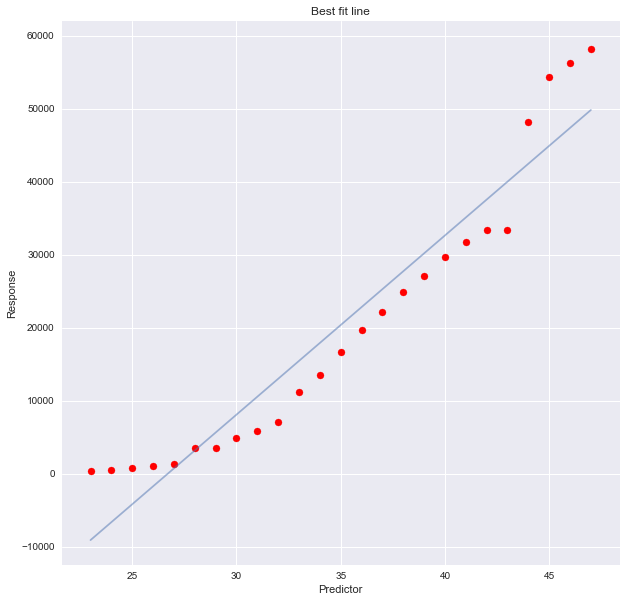

In [22]:
alpha, beta = b
fitted_values = alpha + beta * x

plt.figure(figsize=(10,10))
plt.plot(x, fitted_values, alpha=0.5)
plt.scatter(x, y, color="red")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Best fit line")

If your plot doesn't look identical to the original plot from above, please check your code for mistakes.

### 2.3 Adding a new feature to the dataset

As mentioned already above, since the data appears to have a quadratic trend, we will add a new feature (predictor variable) which equals the squares of the $x$ values. This corresponds to assuming that the true distributions of $X$ and $Y$ which generated the data had the relationship:

$$\hat{y}_i = \alpha + \beta_1 x_i + \beta_2 x_i^2 \,, $$

Adding a new feature to account for the quadratic trend is written in matrix form as:

$$\mathbf{\hat{y}} = \begin{bmatrix} \mathbf{1} & \mathbf{x} & \mathbf{x} \ast \mathbf{x} \end{bmatrix} \begin{bmatrix} \alpha \\ \beta_1 \\ \beta_2 \end{bmatrix} \defequals X b   \quad \implies \quad b = (X^\top X)^{-1} X^\top \mathbf{y}\,  $$



### 2.3.1 Creating a new column with squared values

Form the matrix $X$ as indicated above.

In [23]:
X =  ## SOLUTION

### 2.3.2 Calculate the pseudoinverse

Form the Moore-Penrose psueudoinverse $$(X^\top X)^{-1} X^\top $$

In [24]:
X_pseudo_inverse =  ## SOLUTION

Again, answers using [`np.linalg.pinv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) are technically correct but won't be accepted.

In [25]:
print('"By hand" pseudoinverse:\n\n', X_pseudo_inverse)

"By hand" pseudoinverse:

 [[ 2.36820513e+00  1.84000000e+00  1.35538462e+00  9.14358974e-01
   5.16923077e-01  1.63076923e-01 -1.47179487e-01 -4.13846154e-01
  -6.36923077e-01 -8.16410256e-01 -9.52307692e-01 -1.04461538e+00
  -1.09333333e+00 -1.09846154e+00 -1.06000000e+00 -9.77948718e-01
  -8.52307692e-01 -6.83076923e-01 -4.70256410e-01 -2.13846154e-01
   8.61538462e-02  4.29743590e-01  8.16923077e-01  1.24769231e+00
   1.72205128e+00]
 [-1.28888889e-01 -9.82051282e-02 -7.01226310e-02 -4.46413973e-02
  -2.17614270e-02 -1.48272018e-03  1.61947232e-02  3.12709030e-02
   4.37458194e-02  5.36194723e-02  6.08918618e-02  6.55629877e-02
   6.76328502e-02  6.71014493e-02  6.39687848e-02  5.82348569e-02
   4.98996656e-02  3.89632107e-02  2.54254924e-02  9.28651059e-03
  -9.45373467e-03 -3.07952434e-02 -5.47380156e-02 -8.12820513e-02
  -1.10427350e-01]
 [ 1.70940171e-03  1.28205128e-03  8.91861761e-04  5.38833148e-04
   2.22965440e-04 -5.57413601e-05 -2.97287254e-04 -5.01672241e-04
  -6.688963

As a sanity check, let's compare this with the output of `np.linalg.pinv`.

In [26]:
print("Built-in pseudoinverse:\n\n", np.linalg.pinv(X))

Built-in pseudoinverse:

 [[ 2.36820513e+00  1.84000000e+00  1.35538462e+00  9.14358974e-01
   5.16923077e-01  1.63076923e-01 -1.47179487e-01 -4.13846154e-01
  -6.36923077e-01 -8.16410256e-01 -9.52307692e-01 -1.04461538e+00
  -1.09333333e+00 -1.09846154e+00 -1.06000000e+00 -9.77948718e-01
  -8.52307692e-01 -6.83076923e-01 -4.70256410e-01 -2.13846154e-01
   8.61538462e-02  4.29743590e-01  8.16923077e-01  1.24769231e+00
   1.72205128e+00]
 [-1.28888889e-01 -9.82051282e-02 -7.01226310e-02 -4.46413973e-02
  -2.17614270e-02 -1.48272018e-03  1.61947232e-02  3.12709030e-02
   4.37458194e-02  5.36194723e-02  6.08918618e-02  6.55629877e-02
   6.76328502e-02  6.71014493e-02  6.39687848e-02  5.82348569e-02
   4.98996656e-02  3.89632107e-02  2.54254924e-02  9.28651059e-03
  -9.45373467e-03 -3.07952434e-02 -5.47380156e-02 -8.12820513e-02
  -1.10427350e-01]
 [ 1.70940171e-03  1.28205128e-03  8.91861761e-04  5.38833148e-04
   2.22965440e-04 -5.57413601e-05 -2.97287254e-04 -5.01672241e-04
  -6.6889632

### 2.3.3 Calculate the coefficient vector

Use the Moore-Penrose pseudoinverse to get the coefficient vector $b$:

$$ b = (X^\top X)^{-1} X^\top \mathbf{y}\, $$

In [27]:
b = 

As a sanity check, the cell below prints `b` to ensure that we got a length $3$ vector as we had expected.

In [28]:
b

array([53856.05282051, -4668.88174285,   101.75148644])

### 2.4 Plotting the best fit relationship

The cell below plots the best-fit relationship using these variables.

Text(0.5,1,'Best fit using additional feature')

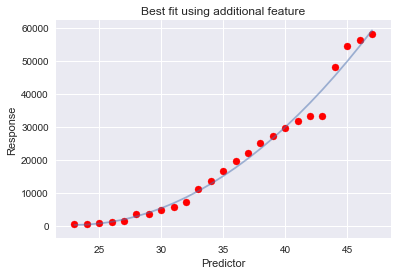

In [29]:
b0, b1, b2 = b
fitted_values = b0 + b1 * x + b2 * x ** 2

plt.plot(x, fitted_values, alpha=0.5)
plt.scatter(x, y, color="red")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Best fit using additional feature")

Does this model fit the dataset better than the linear one?

## Polynomial Regression

In the previous section, we saw how we can fit linear functions to predict trends in COVID-19 cases. But what happens if we do not assume the number of cases is linear in time? It turns out that we can still use least squares to fit more general function.

Suppose instead that we hypothesized that cases followed a polynomial function in time, i.e.

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 t_i^2 + \cdots + \beta_p t_i^p \hspace{30mm} (1)
$$

for all $i=1,\dots,n$.

Using the same dataset consisting of observations of number of cases $y_i$ at time $t_i$, $i=1,\dots, n$, we can use OLS to fit the coefficients $\beta = \begin{bmatrix}\beta_0\\ \beta_1\\ \vdots \\\beta_p\end{bmatrix}$. Indeed, define the matrix 

$$
\mathbf{X} = \begin{bmatrix} 
1 & t_1 & t_1^2&\cdots & t_1^p\\
1 & t_2 & t_2^2 & \cdots & t_2^p\\
\vdots & \vdots & \vdots & \vdots &\vdots\\
1 & t_n& t_n^2 & \cdots & t_n^p
\end{bmatrix}
$$

Then we can write the system (1) as $\mathbf{y} = \mathbf{X}\beta$. The least-squares approach prescribes the fitted values $\widehat{\beta}$ that minimize the squared error:

$$
\min_{\beta} \|\mathbf{X}\beta - y\|_2^2 = \min_{\beta} \sum_{i=1}^n (\beta_0 + \beta_1 t_i + \beta_2 t_i^2 + \cdots + \beta_p t_i^p - y_i)^2
$$

The solution to this is given by the Moore-Penrose psuedoinverse $\widehat{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}\mathbf{y}$, which we can use to make predictions $\hat{y} = \mathbf{X}\widehat{\beta}$. In this section, we will inverstigate fitting polynomials to COVID-19 case data using this method.


### Problem 1: helper functions

First, define a function ```make_polynomial(t, p)``` which takes in a vector $t = [t_1,t_2,\dots,t_n]^\top$ of time observations, and outputs the matrix $\mathbf{X}$ defined above.

In [30]:
def make_polynomial(t,p):
    n = len(t)
    X = np.empty((n, p+1))
    ### begin solution ###

        
    ### end solution ###
    return X


Next, define a function ```fit_coefficients(X,y)``` which takes an $n\times (p+1)$ matrix $\mathbf{X}$ and a vector of responses $\mathbf{y}$ and outputs the least-squares coefficients $\widehat{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}\mathbf{y}$. 

In [31]:
def fit_coefficients(X,y):
    return  ## SOLUTION

### Problem 2: Fitting polynomials to COVID-19 data

The following function will take a vector of coefficients from the equation (1) and plot the corresponding polynomial. Note: this function will use the function ```make_polynomial``` you defined earlier, so it's important that that function is defined correctly.

In [32]:
def plot_poly(beta, x, y):
    t_range = np.arange(10,50,.1)
    X = make_polynomial(t_range, len(beta)-1)
    plt.scatter(x, y, color="red")
    plt.plot(t_range, np.dot(X,beta))
    plt.xlabel('time', fontsize=18)
    plt.ylabel('cases', fontsize=18)
    plt.title('Polynomial of Degree %i' % (len(beta)-1))
    plt.show()

Create matrices $\mathbf{X}_2, \mathbf{X}_3, \mathbf{X}_4, \mathbf{X}_5$ using the ```make_polynomial``` function with $p=2,3,4,5$.

In [33]:
### begin solution ###
X2 = make_polynomial(x, 2)
X3 = make_polynomial(x, ...)
X4 = make_polynomial(x, ...)
X5 = make_polynomial(x, ...)
### end solution ###

Using these matrices, compute the least-squares coefficients $\beta^2, \beta^3, \beta^4, \beta^5$ using the ```fit_coefficients``` function.

In [34]:
### begin solution ###
beta2 = fit_coefficients(... , ...)
beta3 = fit_coefficients(... , ...)
beta4 = fit_coefficients(... , ...)
beta5 = fit_coefficients(... , ...)
### end solution ###

We can visualize the four polynomials we've fit using the ```plot_poly``` function:

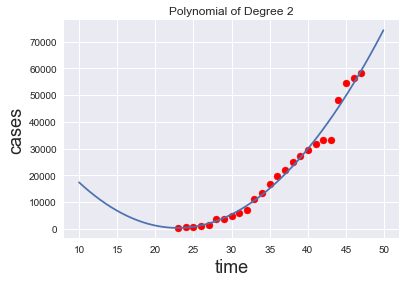

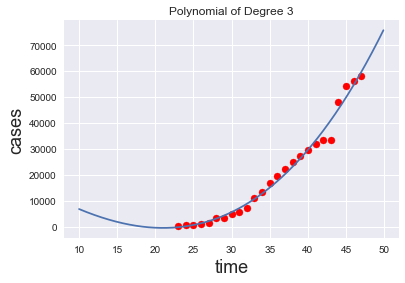

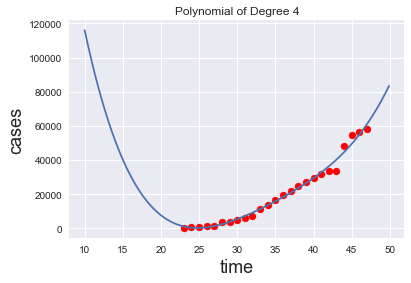

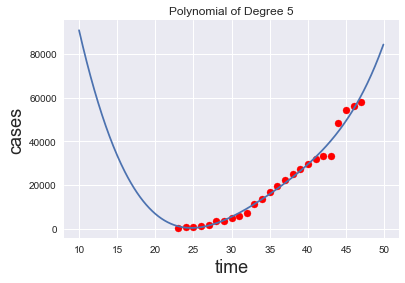

In [35]:
plot_poly(beta2,x,y)
plot_poly(beta3,x,y)
plot_poly(beta4,x,y)
plot_poly(beta5,x,y)

Which degree polynomial seems to fit the data the best? 

## Fitting an exponential function

What if, instead of a line or a polynomial, we hypothesize that the number over cases over time is best desribed by an exponention function $y = ae^{bt}$, for parameters $a,b$. In this case, we can again use OLS to fit the coefficients $a,b$, as follows. Notice that we have
$$
y = ae^{bt} \iff y = e^{\log a + b t} = e^{a' + bt} \iff \log y = a' + bt
$$
where we substitute $a' = \log a$. Thus we see that while the number of cases $y$ may be exponential in $t$, the _logarithm_ of the number of cases is in fact linear in $t$. Hence we can simply fit a linear model as before, except using $\log y$ as our response, rather than $y$ itself. Use the ```fit_coefficients``` defined earlier to fit the least-squares coefficients $\hat{a}',\hat{b}$. 

Create matrices $\mathbf{X}_2$ using the ```make_polynomial``` function with $p=2$

In [36]:
X2 = make_polynomial(x, 1)

Create matrix  $\mathbf{y}_{log}$ using $ \mathbf{y}$ by applying ```np.log``` on $ \mathbf{y}$.

In [37]:
y_log =  ## SOLUTION

Using these matrices, compute the least-squares coefficients $a', b$ using the ```fit_coefficients``` function.

In [38]:
beta2_log =  ## SOLUTION

We can visualize it.

Text(0.5,1,'Best fit exponential')

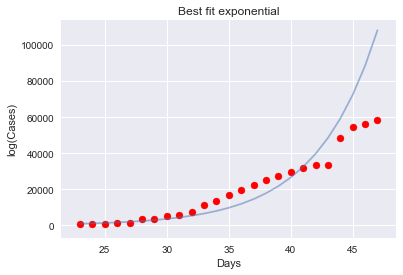

In [39]:
a, b = beta2_log
fitted_values = np.e **(a + b * x) 

plt.plot(x, fitted_values, alpha=0.5)
plt.scatter(x, y, color="red")
plt.xlabel("Days")
plt.ylabel("log(Cases)")
plt.title("Best fit exponential")